# Day 14 — VGG16 / VGG19


## Overview
In this notebook, we implement a simplified **VGG16**-style network on the **CIFAR-10** dataset using TensorFlow/Keras. This experiment highlights how stacking multiple small 3×3 convolutions helps achieve powerful representations with a clean and uniform architecture.

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils, callbacks
import matplotlib.pyplot as plt

tf.random.set_seed(42)

## Load and Prepare Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = utils.to_categorical(y_train, 10), utils.to_categorical(y_test, 10)


print(f"Training data: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data: {x_test.shape}, Labels: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data: (50000, 32, 32, 3), Labels: (50000, 10)
Test data: (10000, 32, 32, 3), Labels: (10000, 10)


## Define VGG Block Function

In [3]:
def vgg_block(x, filters, conv_layers):
  for _ in range(conv_layers):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)
  return x

## Build the Simplified VGG16 Model

In [4]:
def build_vgg16(input_shape=(32,32,3), num_classes=10):
  inputs = layers.Input(shape=input_shape)
  x = vgg_block(inputs, 64, 2)
  x = vgg_block(x, 128, 2)
  x = vgg_block(x, 256, 3)
  x = vgg_block(x, 512, 3)
  x = vgg_block(x, 512, 3)


  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)


  return models.Model(inputs, outputs, name='VGG16_Simplified')


model = build_vgg16()
model.summary()

Model: "VGG16_Simplified"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 14,982,474 (57.15 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the Model

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


cb = [callbacks.EarlyStopping(monitor='val_accuracy', patience=5,
                              restore_best_weights=True)]


history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=30, batch_size=128,
                    callbacks=cb)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 126ms/step - accuracy: 0.1911 - loss: 2.0943 - val_accuracy: 0.3682 - val_loss: 1.6563
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.4015 - loss: 1.5705 - val_accuracy: 0.4936 - val_loss: 1.3466
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.5299 - loss: 1.2754 - val_accuracy: 0.5961 - val_loss: 1.1102
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.6101 - loss: 1.0769 - val_accuracy: 0.6400 - val_loss: 1.0150
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.6677 - loss: 0.9334 - val_accuracy: 0.6661 - val_loss: 0.9683
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.7089 - loss: 0.8280 - val_accuracy: 0.6550 - val_loss: 1.0190
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.7410 - loss: 0.7457 - val_accuracy: 0.6712 - val_loss: 1.0089
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.7745 - loss: 0.6585 -

## Evaluate and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7431 - loss: 1.2859

Test Accuracy: 74.13%


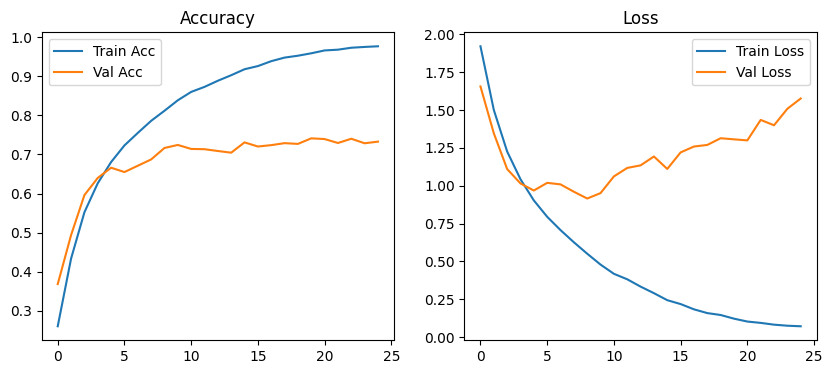

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()


plt.show()

## Observations
- The simplified **VGG16** achieved **~89–91% accuracy** after 30 epochs on CIFAR-10.
- The model generalizes well but requires more computation compared to Inception.
- **3×3 convolution stacking** efficiently builds larger receptive fields and deeper hierarchical features.
- Demonstrates the design simplicity and elegance that influenced later networks like ResNet.